## Worksheet 6
### Sunghyun Ahn

In [1]:
import numpy as np, pandas as pd
from matplotlib.pyplot import subplots
from sklearn.linear_model import \
     (LinearRegression,
      LogisticRegression,
      Lasso)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from sklearn.model_selection import \
     (train_test_split,
      GridSearchCV)

import torch
from torch import nn
from torch.optim import RMSprop
from torch.utils.data import TensorDataset

from torchmetrics import (MeanAbsoluteError,
                          R2Score)
from torchinfo import summary


from torchvision.io import read_image
from torchvision.datasets import MNIST, CIFAR100
from torchvision.models import (resnet50,
                                ResNet50_Weights)
from torchvision.transforms import (Resize,
                                    Normalize,
                                    CenterCrop,
                                    ToTensor)

from ISLP.torch import (SimpleDataModule,
                        SimpleModule,
                        ErrorTracker,
                        rec_num_workers)

from ISLP.torch.imdb import (load_lookup,
                             load_tensor,
                             load_sparse,
                             load_sequential)
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import CSVLogger
from pytorch_lightning import seed_everything
seed_everything(0, workers=True)
torch.use_deterministic_algorithms(True, warn_only=True)

from glob import glob
import json

Seed set to 0


## Exercise 1
Repeat the analysis of the IMDb data using a similarly structured neural network. There we used a dictionary of size 10,000. Consider the effects of varying the dictionary size. Try the values 1000, 3000, 5000, and 10,000, and compare the results using a plot and discuss.

Looking at the different values of the dictionary size, the dictionary size that is greater generally tends to have a better validation accuracy. It does make a little sense because you are essentially using more datapoints to train the model if the dictionary size is bigger. However, it's interesting to see that a dictionary size of 3000 had a better val accuracy than 5000

In [2]:
class IMDBModel(nn.Module):

    def __init__(self, input_size):
        super(IMDBModel, self).__init__()
        self.dense1 = nn.Linear(input_size, 16)
        self.activation = nn.ReLU()
        self.dense2 = nn.Linear(16, 16)
        self.output = nn.Linear(16, 1)

    def forward(self, x):
        val = x
        for _map in [self.dense1,
                     self.activation,
                     self.dense2,
                     self.activation,
                     self.output]:
            val = _map(val)
        return torch.flatten(val)

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



=== Evaluating for vocab size: 1000 ===



  | Name  | Type              | Params | Mode 
----------------------------------------------------
0 | model | IMDBModel         | 16.3 K | train
1 | loss  | BCEWithLogitsLoss | 0      | train
----------------------------------------------------
16.3 K    Trainable params
0         Non-trainable params
16.3 K    Total params
0.065     Total estimated model params size (MB)
6         Modules in train mode
0         Modules in eval mode
c:\Users\sahn1\Documents\SQ2025\DATA-5322\venv312\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:310: The number of training batches (45) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
`Trainer.fit` stopped: `max_epochs=30` reached.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.8352400064468384     │
│         test_loss         │    0.46701979637145996    │
└───────────────────────────┴───────────────────────────┘

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type              | Params | Mode 
----------------------------------------------------
0 | model | IMDBModel         | 48.3 K | train
1 | loss  | BCEWithLogitsLoss | 0      | train
----------------------------------------------------
48.3 K    Trainable params
0         Non-trainable params
48.3 K    Total params
0.193     Total estimated model params size (MB)
6         Modules in train mode
0         Modules in eval mode


Vocab Size 1000: Test Accuracy = 0.8352

=== Evaluating for vocab size: 3000 ===


`Trainer.fit` stopped: `max_epochs=30` reached.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.8479599952697754     │
│         test_loss         │    0.5530942678451538     │
└───────────────────────────┴───────────────────────────┘

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type              | Params | Mode 
----------------------------------------------------
0 | model | IMDBModel         | 80.3 K | train
1 | loss  | BCEWithLogitsLoss | 0      | train
----------------------------------------------------
80.3 K    Trainable params
0         Non-trainable params
80.3 K    Total params
0.321     Total estimated model params size (MB)
6         Modules in train mode
0         Modules in eval mode


Vocab Size 3000: Test Accuracy = 0.8480

=== Evaluating for vocab size: 5000 ===


`Trainer.fit` stopped: `max_epochs=30` reached.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.8465200066566467     │
│         test_loss         │    0.7295759320259094     │
└───────────────────────────┴───────────────────────────┘

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type              | Params | Mode 
----------------------------------------------------
0 | model | IMDBModel         | 160 K  | train
1 | loss  | BCEWithLogitsLoss | 0      | train
----------------------------------------------------
160 K     Trainable params
0         Non-trainable params
160 K     Total params
0.641     Total estimated model params size (MB)
6         Modules in train mode
0         Modules in eval mode


Vocab Size 5000: Test Accuracy = 0.8465

=== Evaluating for vocab size: 10000 ===


`Trainer.fit` stopped: `max_epochs=30` reached.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.8508399724960327     │
│         test_loss         │    1.0957601070404053     │
└───────────────────────────┴───────────────────────────┘

Vocab Size 10000: Test Accuracy = 0.8508


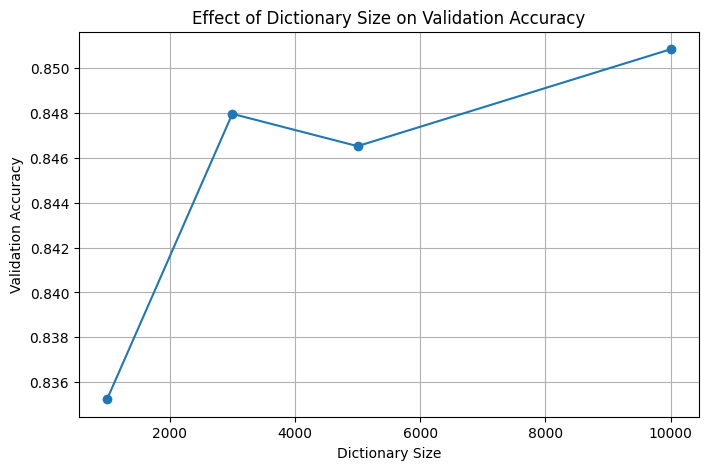

In [5]:
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

dict_sizes = [1000, 3000, 5000, 10000]
val_accuracies = []

max_num_workers = 10

# Load full data once
imdb_train_full, imdb_test_full = load_tensor(root='data/IMDB')

for vocab_size in dict_sizes:
    print(f"\n=== Evaluating for vocab size: {vocab_size} ===")

    # Truncate the input tensors
    X_train = imdb_train_full.tensors[0][:, :vocab_size]
    y_train = imdb_train_full.tensors[1]
    X_test = imdb_test_full.tensors[0][:, :vocab_size]
    y_test = imdb_test_full.tensors[1]

    # Wrap them into datasets
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)

    imdb_dm = SimpleDataModule(train_dataset,
                           test_dataset,
                           validation=2000,
                           num_workers=min(6, max_num_workers),
                           batch_size=512)

    model = IMDBModel(input_size=vocab_size)
    optimizer = RMSprop(model.parameters(), lr=0.001)

    module = SimpleModule.binary_classification(model, optimizer=optimizer)

    logger = CSVLogger('logs', name=f'IMDB_vocab{vocab_size}')
    trainer = Trainer(deterministic=True,
                      max_epochs=30,
                      logger=logger,
                      enable_progress_bar=False,
                      callbacks=[ErrorTracker()])

    trainer.fit(module, datamodule=imdb_dm)
    test_results = trainer.test(module, datamodule=imdb_dm)
    val_acc = test_results[0]['test_accuracy']
    val_accuracies.append(val_acc)
    print(f"Vocab Size {vocab_size}: Test Accuracy = {val_acc:.4f}")

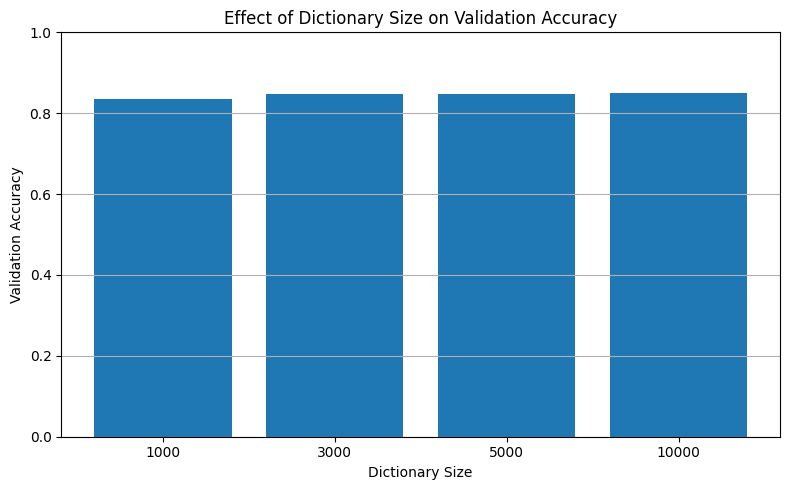

In [6]:
plt.figure(figsize=(8, 5))
plt.bar([str(size) for size in dict_sizes], val_accuracies)
plt.title("Effect of Dictionary Size on Validation Accuracy")
plt.xlabel("Dictionary Size")
plt.ylabel("Validation Accuracy")
plt.ylim(0, 1)  # optional: sets y-axis from 0 to 1 for easier comparison
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Now using the size of dictionary you find to be sufficient, test out two new batch sizes, show a plot of the convergence of the model, and comment on the results. 

Okay, so the looking at the two new batches of 256 and 1024, we can see that the batch size of 256 is overfitting very heavily. The validation loss is increasing very very heavily. It seems that the batch size of 1024 is more reasonable. Overall, with that, the result of model trained with a batch size of 1024 seems better, but it can be better with more fine-tuning.

In [14]:
batch_sizes = [256, 1024]
train_logs = {}
val_logs = {}
train_acc_logs = {}
val_acc_logs = {}

# Load full data
imdb_train_full, imdb_test_full = load_tensor(root='data/IMDB')
X_train = imdb_train_full.tensors[0][:, :10000]
y_train = imdb_train_full.tensors[1]
X_test = imdb_test_full.tensors[0][:, :10000]
y_test = imdb_test_full.tensors[1]

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

for batch_size in batch_sizes:
    print(f"\nTraining with batch size {batch_size}")
    
    # DataModule with batch size
    imdb_dm = SimpleDataModule(train_dataset, test_dataset, validation=2000, batch_size=batch_size)

    # Model
    model = IMDBModel(input_size=10000)
    optimizer = RMSprop(model.parameters(), lr=0.001)
    module = SimpleModule.binary_classification(model, optimizer=optimizer)

    # Logger
    logger = CSVLogger("logs", name=f"IMDB_bs{batch_size}")

    # Trainer
    trainer = Trainer(
        max_epochs=30,
        deterministic=True,
        logger=logger,
        callbacks=[ErrorTracker()],
        enable_progress_bar=False
    )

    trainer.fit(module, datamodule=imdb_dm)

    # Load logged training loss
    log_path = logger.log_dir + "/metrics.csv"
    log_data = pd.read_csv(log_path)

    train_logs[batch_size] = log_data['train_loss'].dropna().values
    val_logs[batch_size] = log_data['valid_loss'].dropna().values
    train_acc_logs[batch_size] = log_data['train_accuracy_epoch'].dropna().values
    val_acc_logs[batch_size] = log_data['valid_accuracy'].dropna().values

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type              | Params | Mode 
----------------------------------------------------
0 | model | IMDBModel         | 160 K  | train
1 | loss  | BCEWithLogitsLoss | 0      | train
----------------------------------------------------
160 K     Trainable params
0         Non-trainable params
160 K     Total params
0.641     Total estimated model params size (MB)
6         Modules in train mode
0         Modules in eval mode



Training with batch size 256


c:\Users\sahn1\Documents\SQ2025\DATA-5322\venv312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
c:\Users\sahn1\Documents\SQ2025\DATA-5322\venv312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
`Trainer.fit` stopped: `max_epochs=10` reached.
Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type          


Training with batch size 1024


`Trainer.fit` stopped: `max_epochs=10` reached.


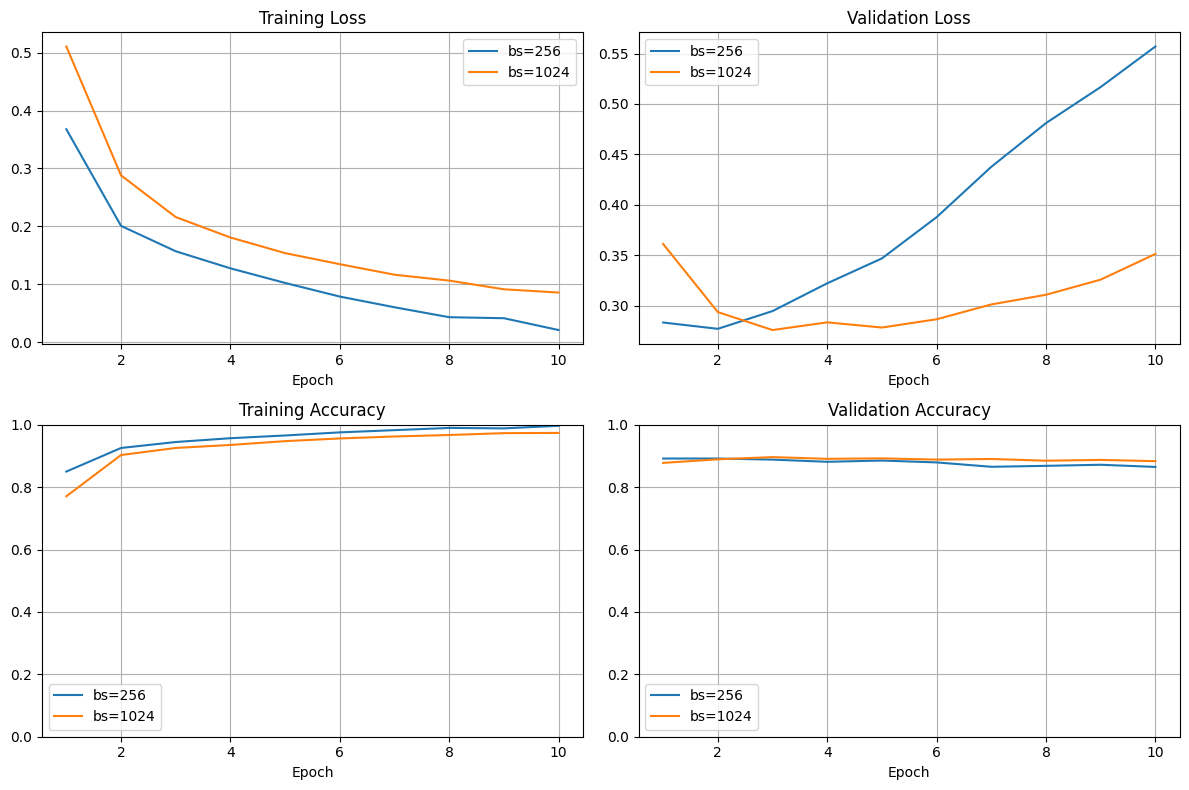

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
metrics = {
    'Training Loss': train_logs,
    'Validation Loss': val_logs,
    'Training Accuracy': train_acc_logs,
    'Validation Accuracy': val_acc_logs
}

for ax, (title, logs) in zip(axes.ravel(), metrics.items()):
    for batch_size, values in logs.items():
        ax.plot(range(1, len(values)+1), values, label=f'bs={batch_size}')
    ax.set_title(title)
    ax.set_xlabel('Epoch')
    ax.grid(True)
    if 'Accuracy' in title:
        ax.set_ylim(0, 1)
    ax.legend()

plt.tight_layout()
plt.show()

Finally, using the size of dictionary you find to be sufficient and the original batch size of 512, test out a higher number of training epochs. Show a plot of the convergence of the model, and comment on the results. 

Massive overfitting. The validation loss increases from the start and keeps going up. This is a good indication of an overfit model and a very very overfit model at that. Also the accuracy curves do not look good. We definitely need to optimize maybe the learning rate or something, but the output is not right.

In [18]:
batch_size = 512

train_logs = {}
val_logs = {}
train_acc_logs = {}
val_acc_logs = {}

# Load full data
imdb_train_full, imdb_test_full = load_tensor(root='data/IMDB')
X_train = imdb_train_full.tensors[0][:, :10000]
y_train = imdb_train_full.tensors[1]
X_test = imdb_test_full.tensors[0][:, :10000]
y_test = imdb_test_full.tensors[1]

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
   
# DataModule with batch size
imdb_dm = SimpleDataModule(train_dataset, test_dataset, validation=2000, batch_size=batch_size)

# Model
model = IMDBModel(input_size=10000)
optimizer = RMSprop(model.parameters(), lr=0.001)
module = SimpleModule.binary_classification(model, optimizer=optimizer)

# Logger
logger = CSVLogger("logs", name=f"IMDB_bs{batch_size}")

# Trainer
trainer = Trainer(
    max_epochs=100,
    deterministic=True,
    logger=logger,
    callbacks=[ErrorTracker()],
    enable_progress_bar=False
)

trainer.fit(module, datamodule=imdb_dm)

# Load logged training loss
log_path = logger.log_dir + "/metrics.csv"
log_data = pd.read_csv(log_path)

train_logs[batch_size] = log_data['train_loss'].dropna().values
val_logs[batch_size] = log_data['valid_loss'].dropna().values
train_acc_logs[batch_size] = log_data['train_accuracy_epoch'].dropna().values
val_acc_logs[batch_size] = log_data['valid_accuracy'].dropna().values

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type              | Params | Mode 
----------------------------------------------------
0 | model | IMDBModel         | 160 K  | train
1 | loss  | BCEWithLogitsLoss | 0      | train
----------------------------------------------------
160 K     Trainable params
0         Non-trainable params
160 K     Total params
0.641     Total estimated model params size (MB)
6         Modules in train mode
0         Modules in eval mode
c:\Users\sahn1\Documents\SQ2025\DATA-5322\venv312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the 

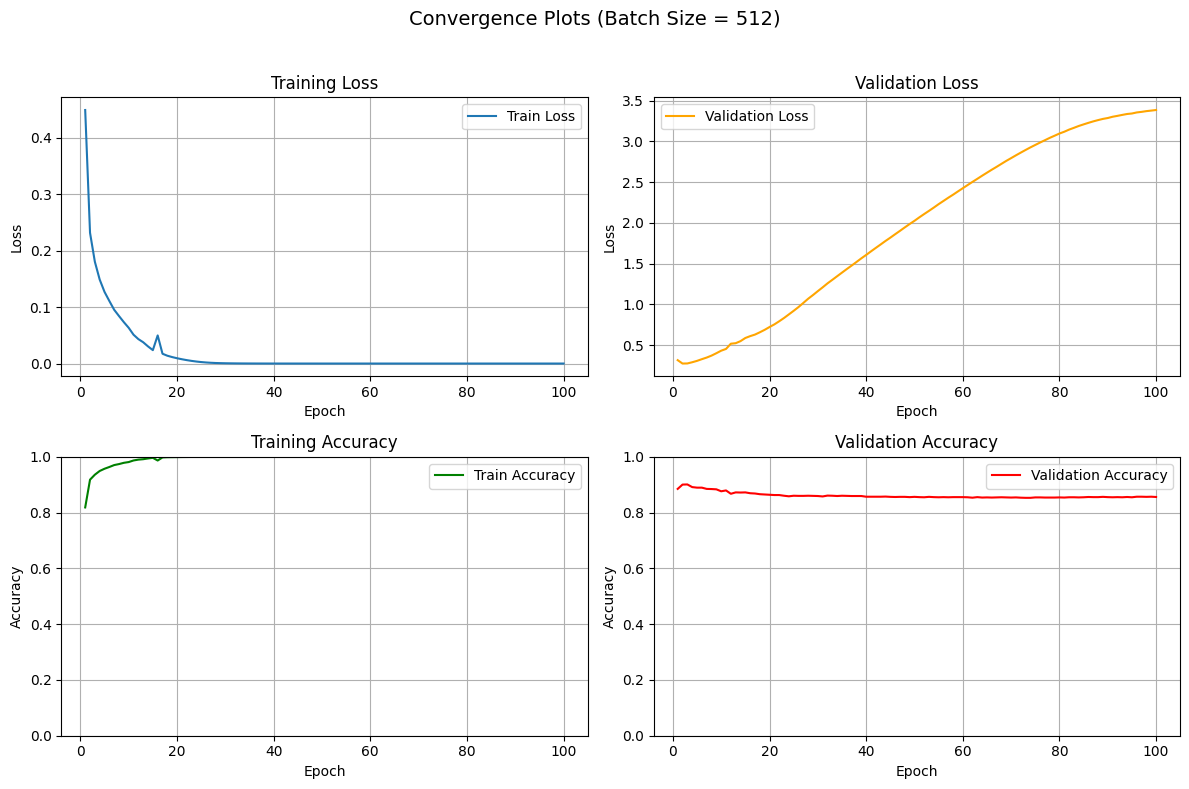

In [19]:
batch_size = 512  # The batch size you used

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot Training Loss
axes[0, 0].plot(range(1, len(train_logs[batch_size]) + 1), train_logs[batch_size], label='Train Loss')
axes[0, 0].set_title('Training Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].grid(True)

# Plot Validation Loss
axes[0, 1].plot(range(1, len(val_logs[batch_size]) + 1), val_logs[batch_size], label='Validation Loss', color='orange')
axes[0, 1].set_title('Validation Loss')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].grid(True)

# Plot Training Accuracy
axes[1, 0].plot(range(1, len(train_acc_logs[batch_size]) + 1), train_acc_logs[batch_size], label='Train Accuracy', color='green')
axes[1, 0].set_title('Training Accuracy')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].grid(True)

# Plot Validation Accuracy
axes[1, 1].plot(range(1, len(val_acc_logs[batch_size]) + 1), val_acc_logs[batch_size], label='Validation Accuracy', color='red')
axes[1, 1].set_title('Validation Accuracy')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_ylim(0, 1)
axes[1, 1].grid(True)

# Final touches
for ax in axes.ravel():
    ax.legend()

plt.suptitle(f"Convergence Plots (Batch Size = {batch_size})", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Exercise 2
Consider the RNN we fit to the NYSE data. Modify the code to allow inclusion of the variable `day of week`, and fit the RNN. Compute the test $R^2$.

Now, modify the code to have 7 lags instead of 5. What does this change about the network? How does it affect your results?